In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
df= pd.read_csv('Churn_Modelling.csv')

In [183]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [184]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [185]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [186]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [187]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [188]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [189]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [191]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [192]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [193]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [194]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [195]:
model = Sequential()

In [196]:
model.add(Dense(5,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [197]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 60        
                                                                 
 dense_21 (Dense)            (None, 3)                 18        
                                                                 
 dense_22 (Dense)            (None, 1)                 4         
                                                                 
Total params: 82 (328.00 Byte)
Trainable params: 82 (328.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [198]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [199]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


200/200 [==============================] - 1s 2ms/step - loss: 0.8312 - accuracy: 0.4358 - val_loss: 0.6428 - val_accuracy: 0.7200
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7869 - val_loss: 0.4992 - val_accuracy: 0.7881
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7911 - val_loss: 0.4576 - val_accuracy: 0.7931
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7952 - val_loss: 0.4441 - val_accuracy: 0.7981
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8042 - val_loss: 0.4367 - val_accuracy: 0.8100
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8133 - val_loss: 0.4314 - val_accuracy: 0.8131
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8177 - val_loss: 0.4268 - val_accuracy: 0.8138
Epoch 8/100

In [200]:
model.layers[1].get_weights()

[array([[ 1.2287959 , -0.18089262, -0.9228112 ],
        [ 0.81219363,  0.21244204, -0.15048091],
        [-0.86619204,  0.48293376,  0.27582884],
        [ 0.30814114,  0.76519966,  0.96813905],
        [-0.5016774 ,  1.0120969 ,  1.1802714 ]], dtype=float32),
 array([ 0.7069037 , -0.16930108, -0.2557411 ], dtype=float32)]

In [201]:
y_log=model.predict(X_test)

63/63 [==============================] - 0s 800us/step


In [202]:
y_pred=np.where(y_log>0.5,1,0)

In [203]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [204]:
import matplotlib.pyplot as plt

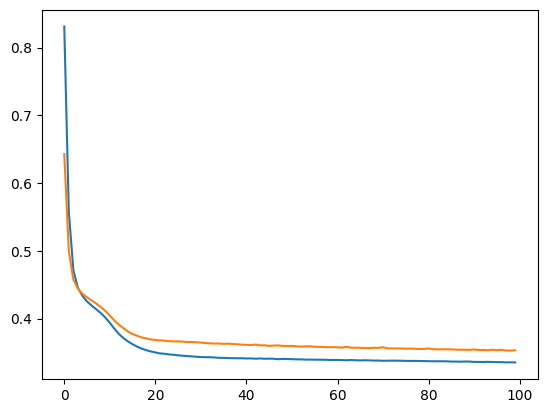

In [205]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

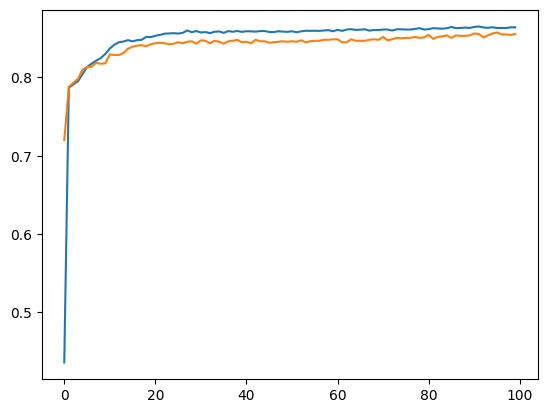

In [206]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])